### Eleanor Gallay
### June 27, 2024

This notebook recreates my Disappearing Stars v3 and v4 filters and plots light curves of several stars that pass these filters. Difference magnitudes are converted to apparent magnitudes using the equation: m = -2.5log(10^(-0.4d) + 10^(-0.4a)) where d is the difference mag, a is the alert mag, and m is the apparent mag.

In [23]:
import settings
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

from lasairmod import LasairError, lasair_client as lasair
import sys, time
import json

In [2]:
L = lasair(settings.API_TOKEN, endpoint = "https://lasair-ztf.lsst.ac.uk/api")

This first section pulls 32 light curves from my "Disappearing Stars v3 filter" and adds some additional plots to two objects of interest, ZTF24aaonljp and ZTF24aaoowwa.

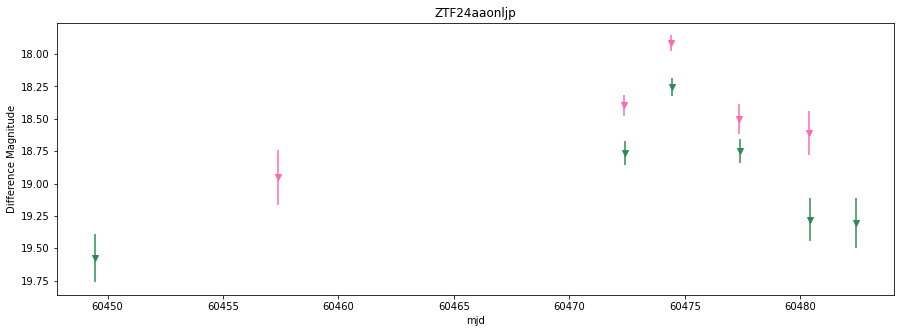

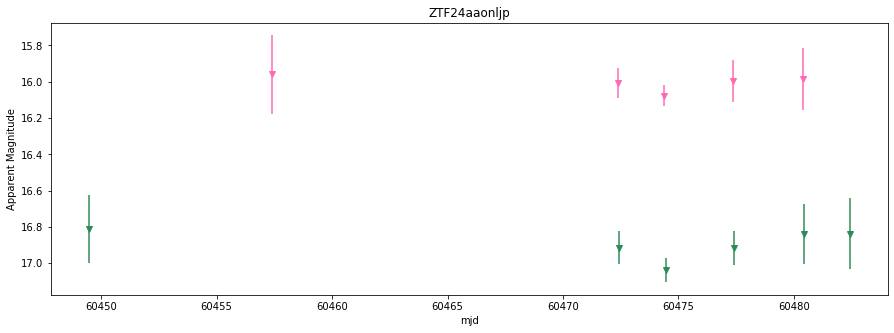

In [26]:
test = L.objects(['ZTF24aaonljp'])
testDict = {}

for obj in test:
    testDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'seagreen',2:'hotpink'}

now = Time.now().jd

for obj in test:
        plt.figure(figsize = (15,5))
        plt.subplot(111)
        for i in testDict[obj['objectId']]['candidates']:
            if 'isdiffpos' in i:
                if i['isdiffpos']=='t':          # 't' means positive difference magnitude (brightening) 
                                                 # 'f' means negative (fainting)
                    plt.errorbar(i['mjd'],i['magpsf'],i['sigmapsf'],fmt='^',color=cols[i['fid']])
                else:
                    plt.errorbar(i['mjd'],i['magpsf'],i['sigmapsf'],fmt='v',color=cols[i['fid']])

        plt.gca().invert_yaxis()
        plt.ylabel('Difference Magnitude')
        plt.xlabel('mjd')
        plt.title(obj['objectId'])
        
        plt.figure(figsize = (15,5))
        plt.subplot(111)
        for i in testDict[obj['objectId']]['candidates']:
            if 'isdiffpos' in i:
                if i['isdiffpos']=='t':          # 't' means positive difference magnitude (brightening) 
                                                 # 'f' means negative (fainting)
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) + (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='^',color=cols[i['fid']])
                else:
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) - (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='v',color=cols[i['fid']])

        plt.gca().invert_yaxis()
        plt.ylabel('Apparent Magnitude')
        plt.xlabel('mjd')
        plt.title(obj['objectId'])
        

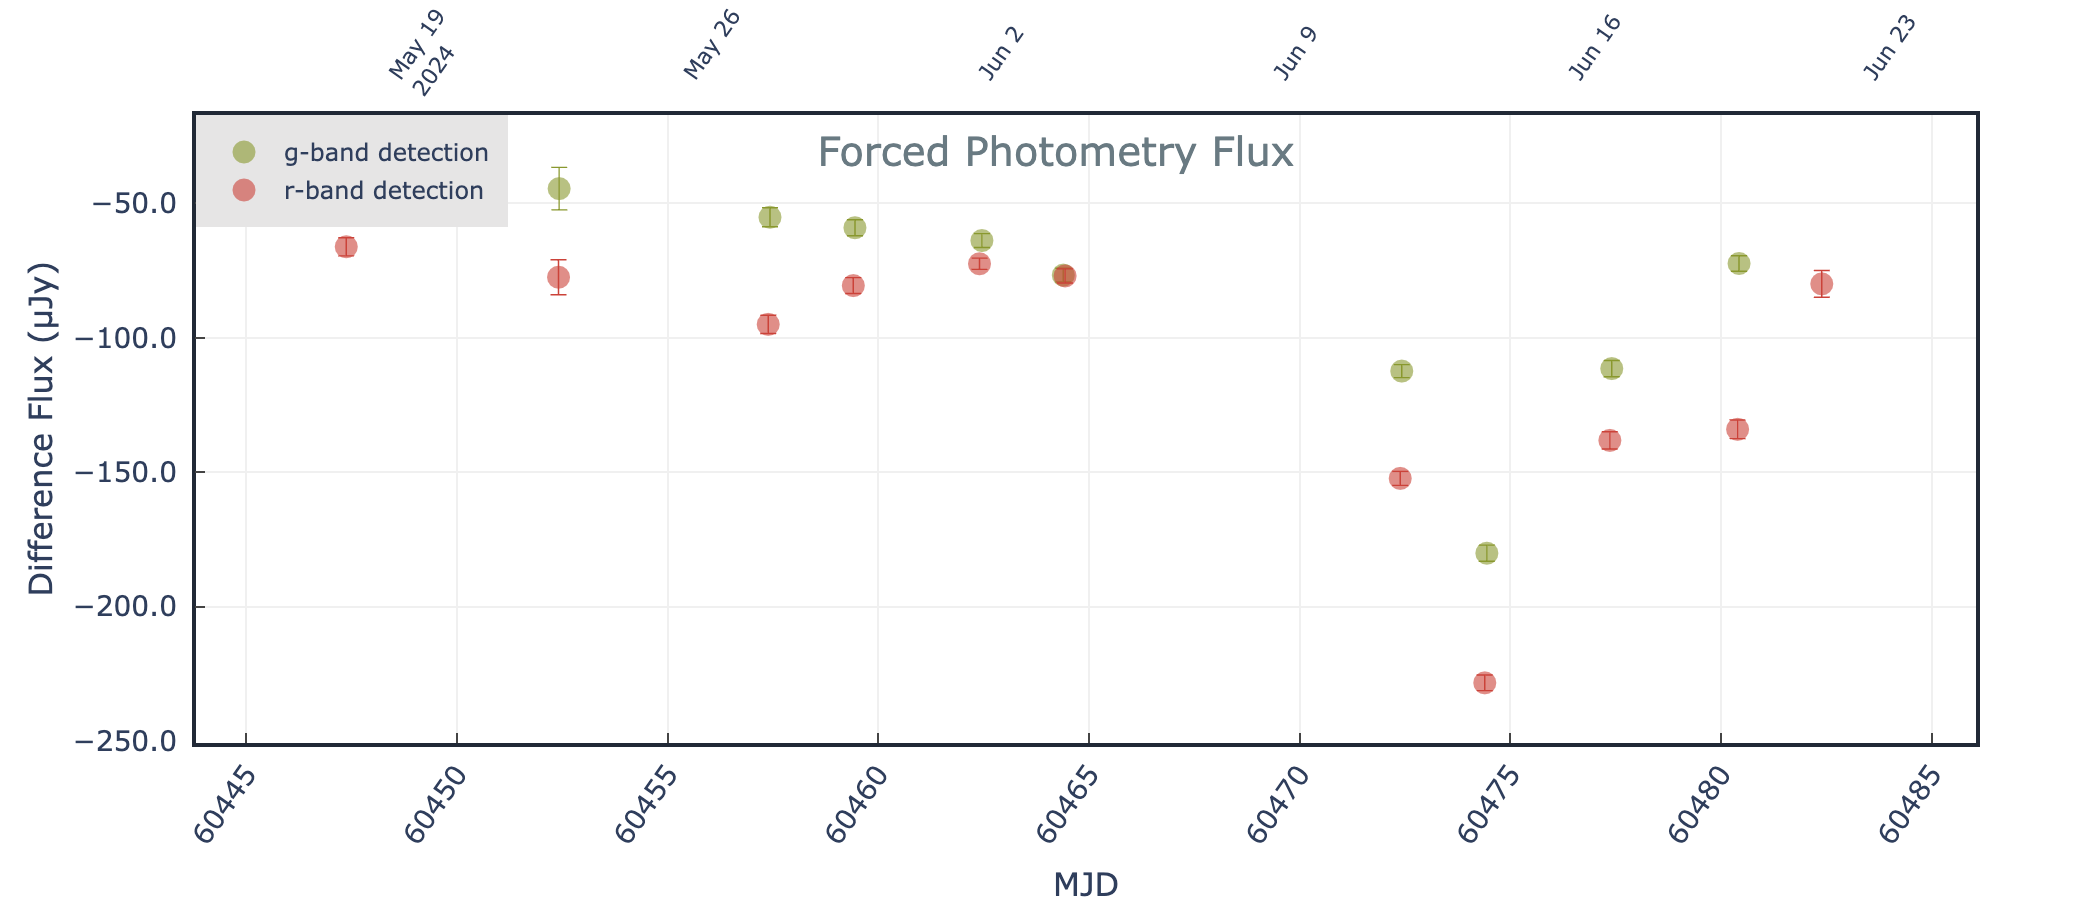

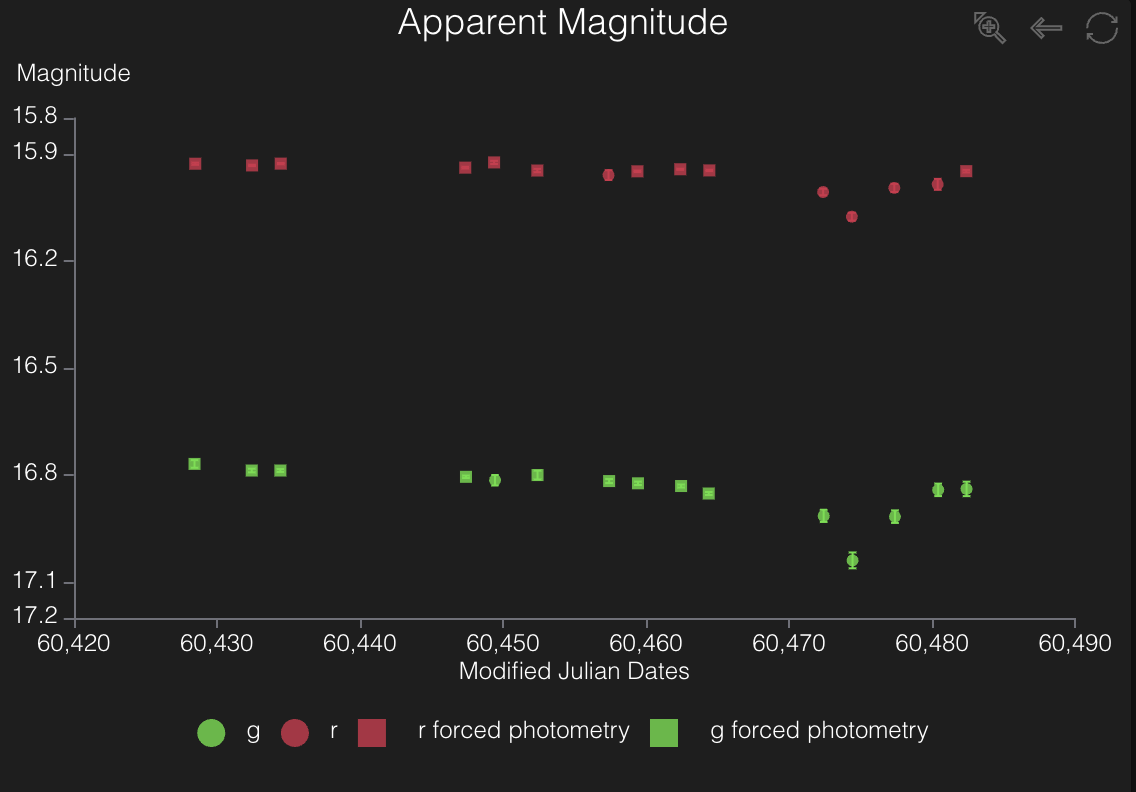

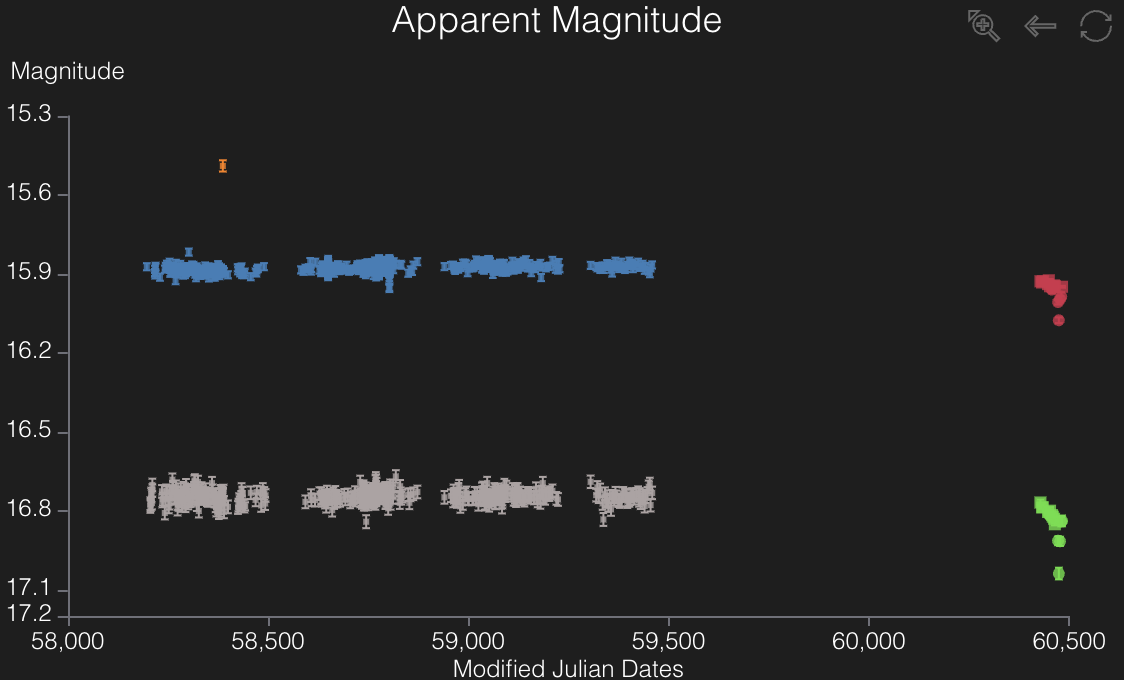

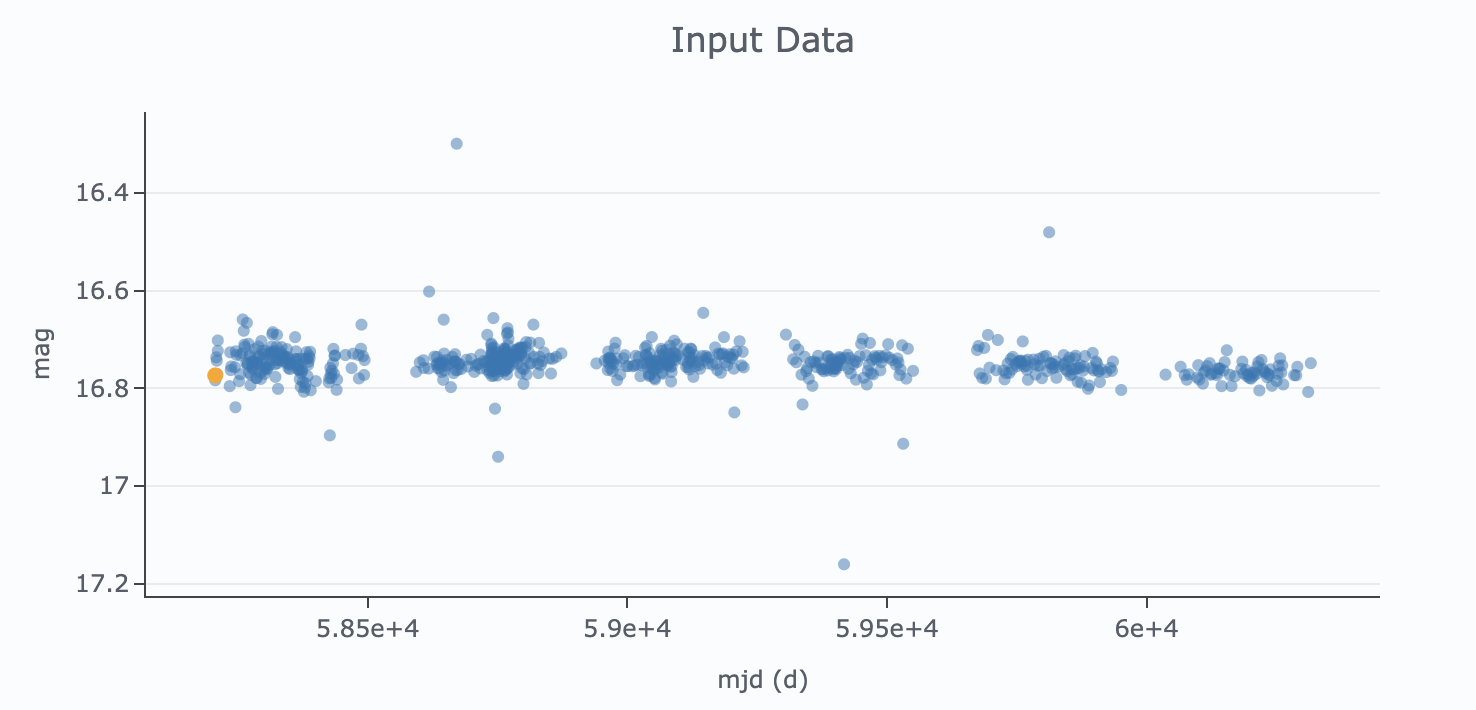

In [4]:
selected = '*'


tables = 'objects,sherlock_classifications'


conditions = """
objects.objectId=sherlock_classifications.objectId
AND (objects.sgscore1 > 0.9)
AND (sherlock_classifications.classification != "SN")
AND (sherlock_classifications.classification != "NT")
AND (sherlock_classifications.classification != "AGN")
AND (objects.ncand > 5)
AND (objects.ncand < 20)
AND (sherlock_classifications.catalogue_table_name LIKE "%gaia%")
AND (objects.objectId LIKE "ZTF24%")
AND sherlock_classifications.separationArcsec < 0.5
AND ((objects.sgmag1 < 16)
   OR (objects.srmag1 < 16))
AND ((objects.mag_r28 < objects.mag_r08 < objects.mag_r02)
   OR (objects.mag_g28 < objects.mag_g08 < objects.mag_g02))
AND ISNULL(objects.ncandgp)
AND (((objects.mag_r02 - objects.mag_r28) > 0.3)
   OR ((objects.mag_g02 - objects.mag_g28) > 0.3))


"""
Dippers = L.query(selected, tables, conditions)

In [5]:
len(Dippers)

32

/var/folders/39/_j5zssj14k9d0742tpg79j380000gn/T/ipykernel_6262/1619465348.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


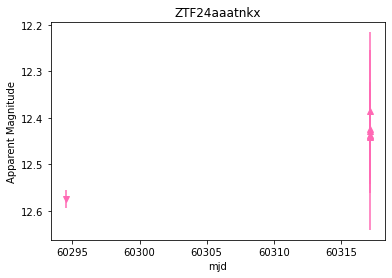

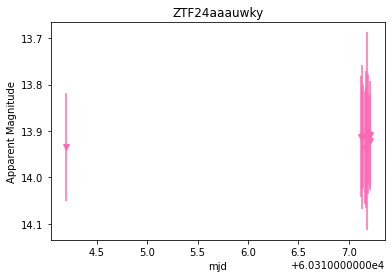

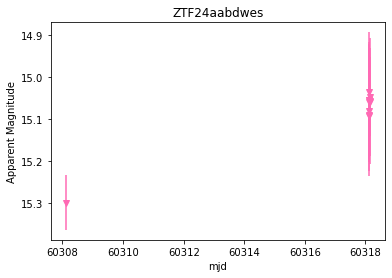

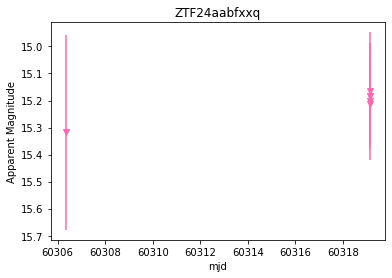

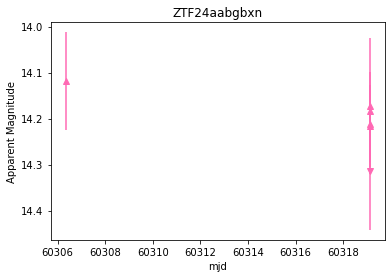

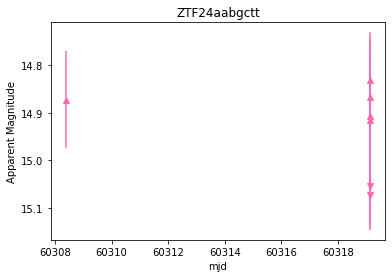

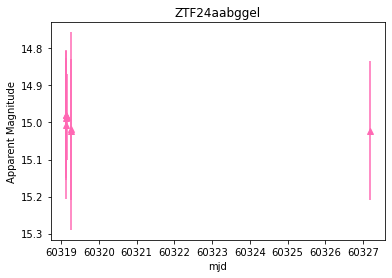

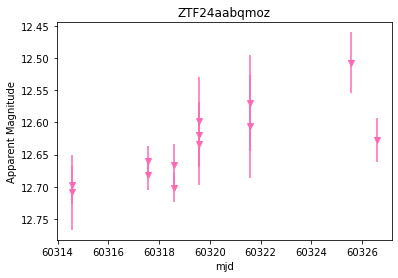

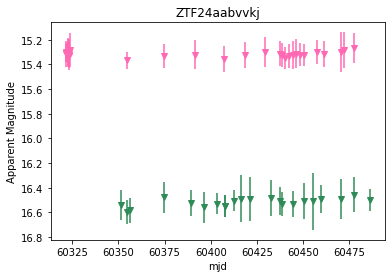

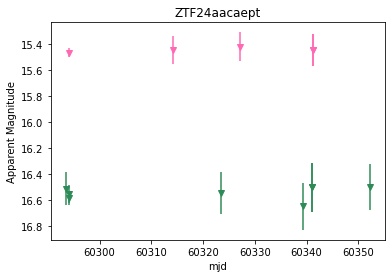

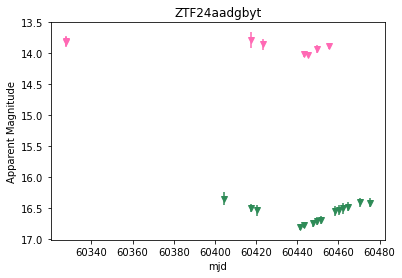

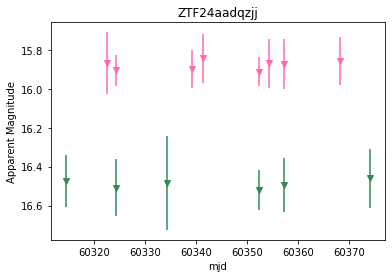

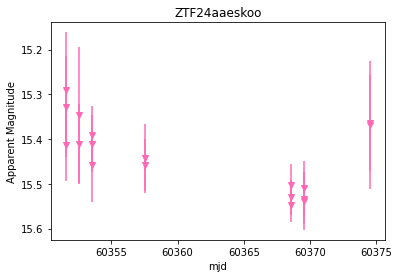

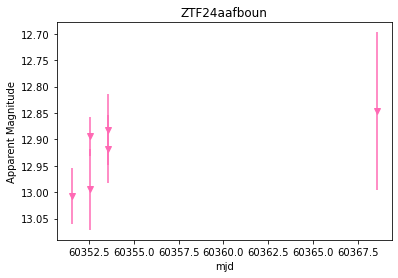

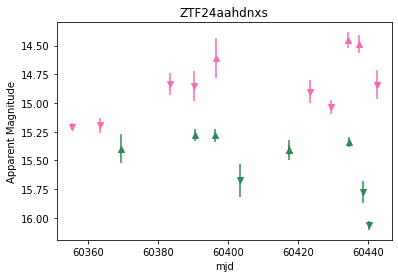

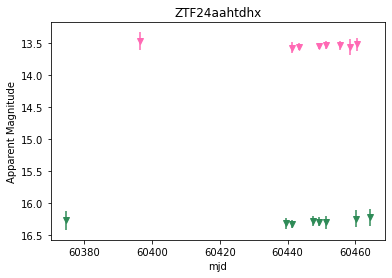

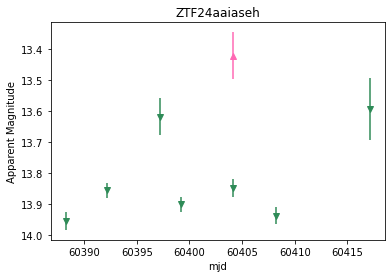

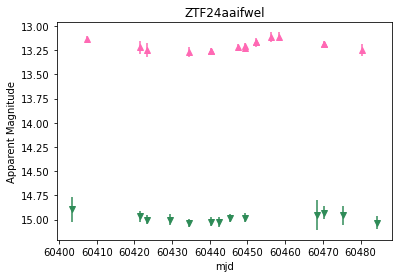

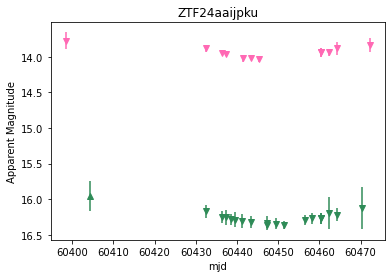

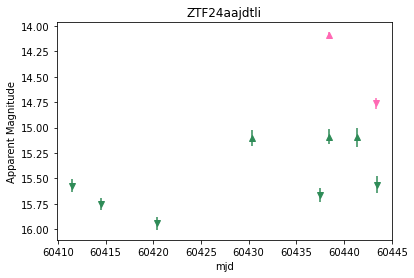

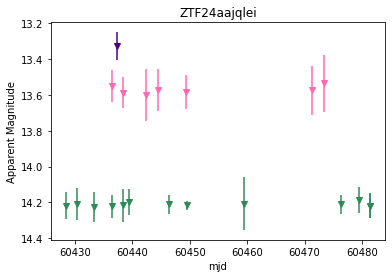

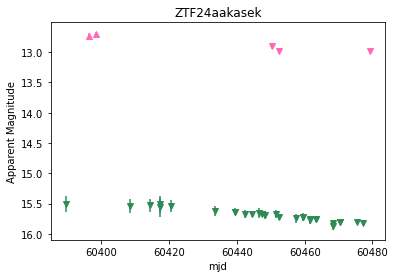

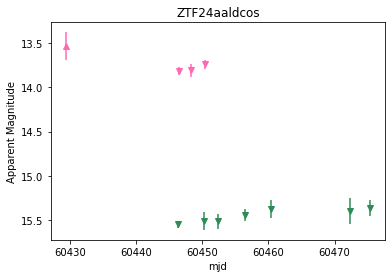

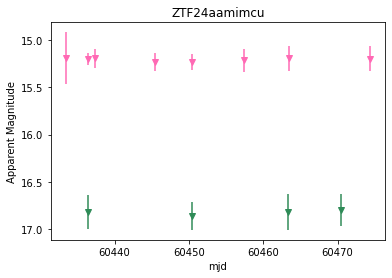

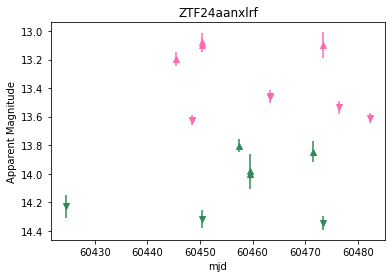

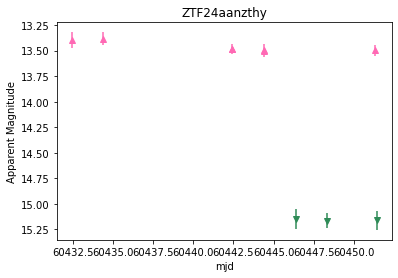

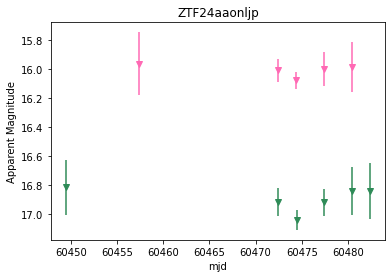

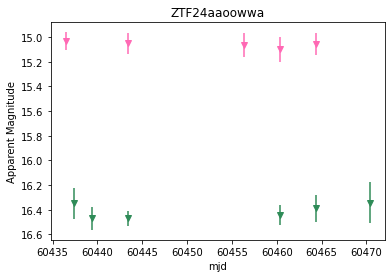

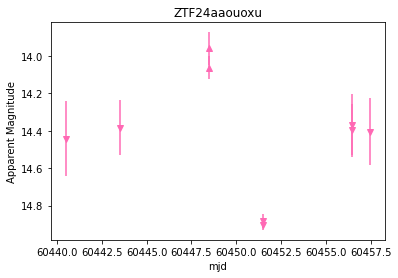

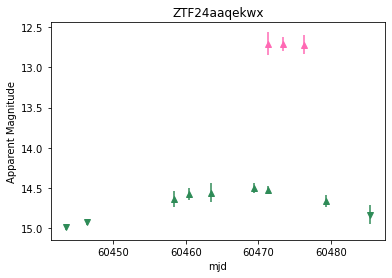

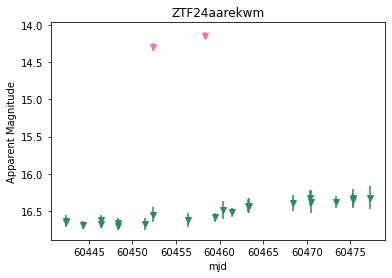

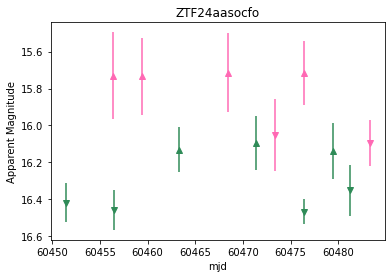

In [30]:
objectList = [row['objectId'] for row in Dippers]
Dippers = L.objects(objectList)

# create an dictionary of lightcurves

DipperDict = {}
for obj in Dippers:
    DipperDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'seagreen',2:'hotpink', 3: 'indigo'}

now = Time.now().jd

for obj in Dippers:
        plt.figure()
        plt.subplot(111)
        for i in DipperDict[obj['objectId']]['candidates']:
            if 'isdiffpos' in i:
                if i['isdiffpos']=='t':          # 't' means positive difference magnitude (brightening) 
                                                 # 'f' means negative (fainting)
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) + (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='^',color=cols[i['fid']])
                else:
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) - (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='v',color=cols[i['fid']])

        plt.gca().invert_yaxis()
        plt.ylabel('Apparent Magnitude')
        plt.xlabel('mjd')
        plt.title(obj['objectId'])
        


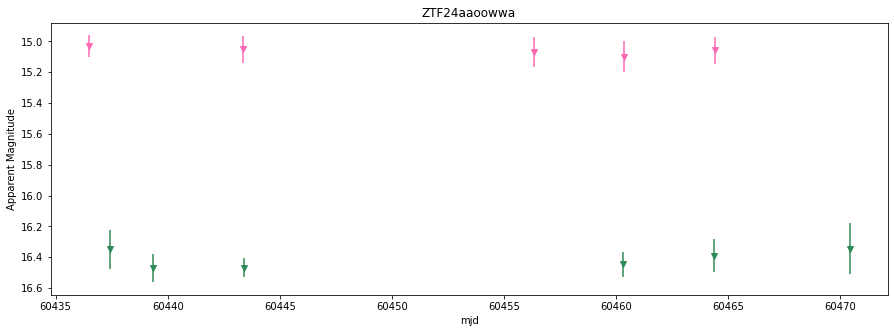

In [31]:
aaoowwa = L.objects(['ZTF24aaoowwa'])
aaoowwaDict = {}

for obj in aaoowwa:
    aaoowwaDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'seagreen',2:'hotpink'}

now = Time.now().jd

for obj in aaoowwa:
        plt.figure(figsize = (15,5))
        plt.subplot(111)
        for i in aaoowwaDict[obj['objectId']]['candidates']:
            if 'isdiffpos' in i:
                if i['isdiffpos']=='t':          # 't' means positive difference magnitude (brightening) 
                                                 # 'f' means negative (fainting)
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) + (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='^',color=cols[i['fid']])
                else:
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) - (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='v',color=cols[i['fid']])

        plt.gca().invert_yaxis()
        plt.ylabel('Apparent Magnitude')
        plt.xlabel('mjd')
        plt.title(obj['objectId'])
        
        

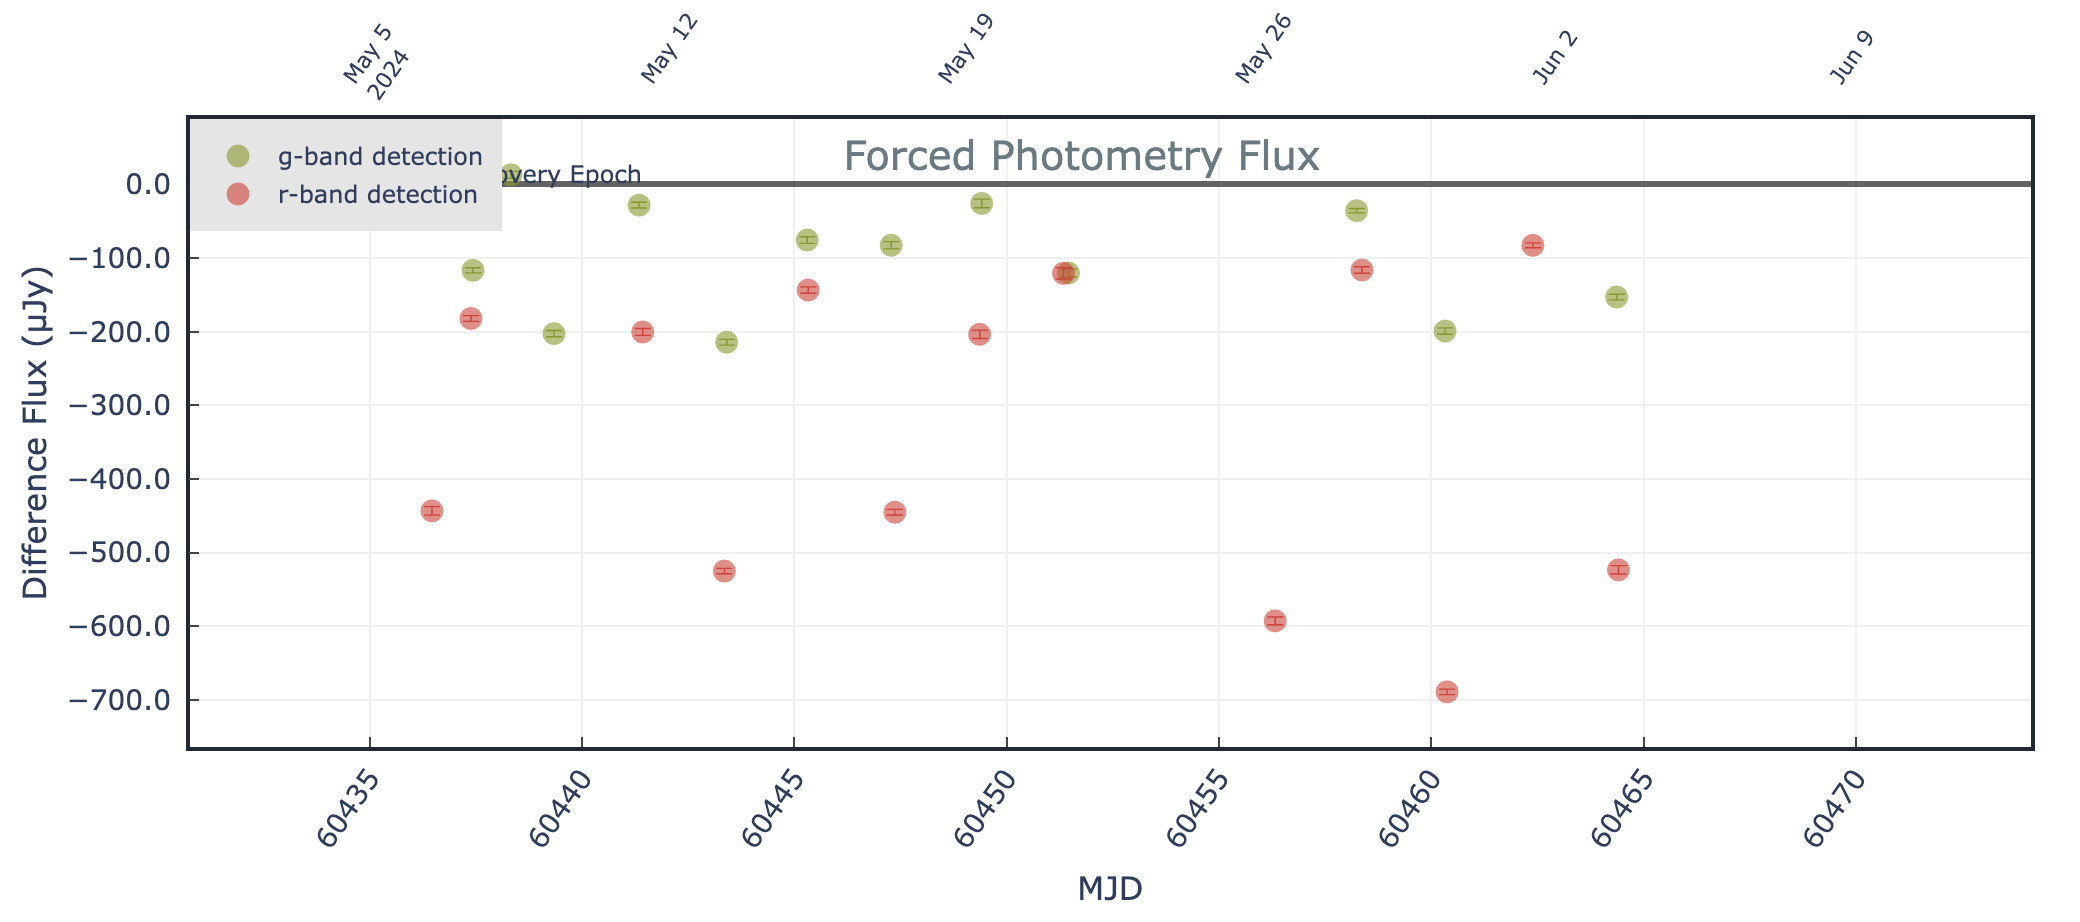

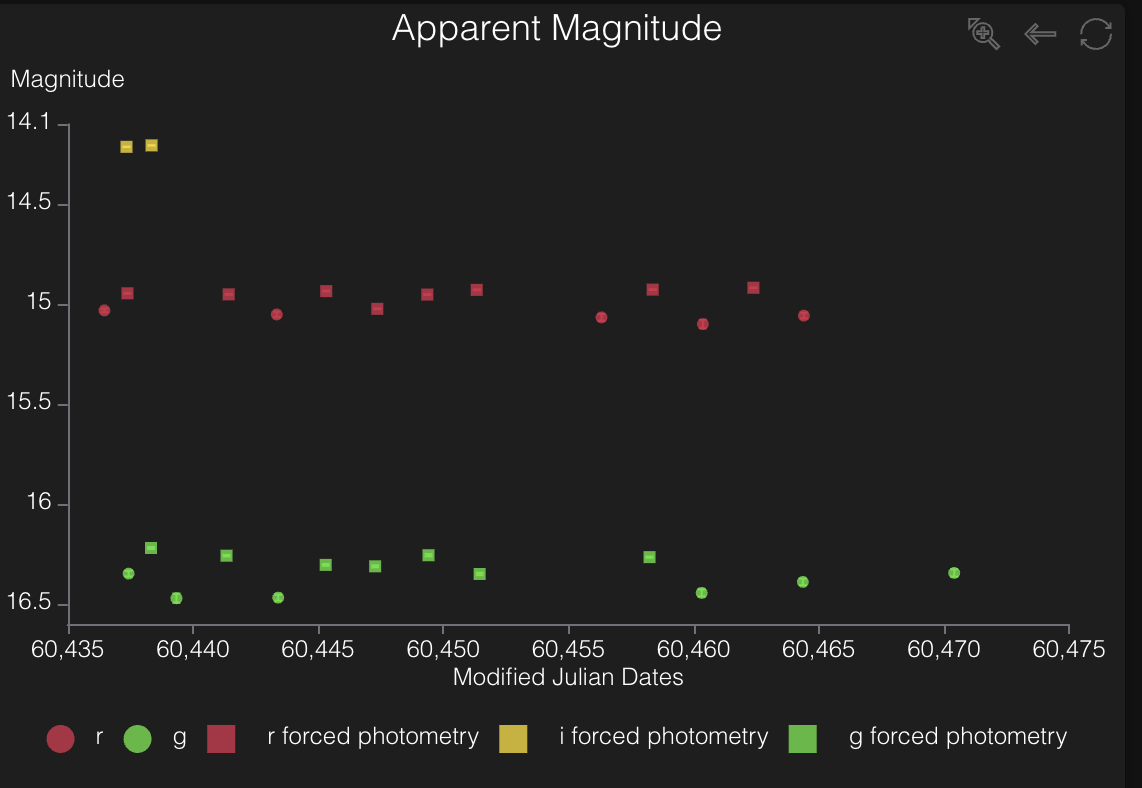

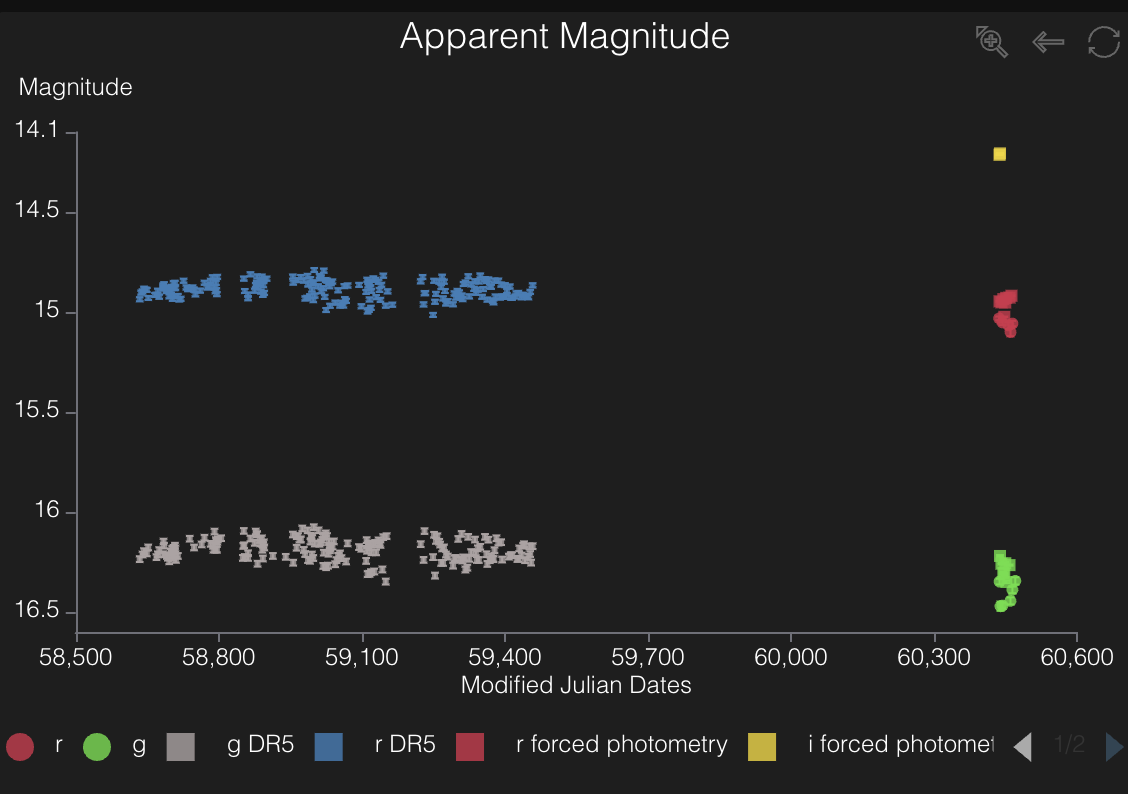

Next we pull some light curves to the less restrictive v4 of the disappearing stars filter.

In [10]:
selected = '*'


tables = 'objects,sherlock_classifications'


conditions = """
objects.objectId=sherlock_classifications.objectId
AND (objects.sgscore1 > 0.9)
AND (sherlock_classifications.classification != "SN")
AND (sherlock_classifications.classification != "NT")
AND (sherlock_classifications.classification != "AGN")
AND (objects.ncand > 5)
AND (objects.ncand < 20)
AND (sherlock_classifications.catalogue_table_name LIKE "%gaia%")
AND (objects.objectId LIKE "ZTF24%")
AND sherlock_classifications.separationArcsec < 0.5
AND ((objects.sgmag1 < 16)
   OR (objects.srmag1 < 16))
AND ((objects.mag_r28 < objects.mag_r08 < objects.mag_r02)
   OR (objects.mag_g28 < objects.mag_g08 < objects.mag_g02))
AND ISNULL(objects.ncandgp)


"""
Dippersv4 = L.query(selected, tables, conditions, limit = 20)

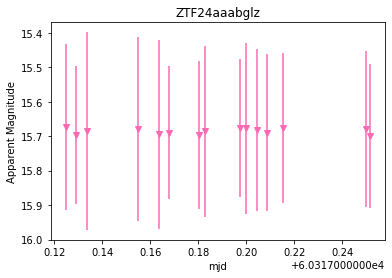

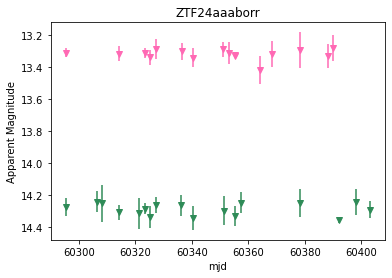

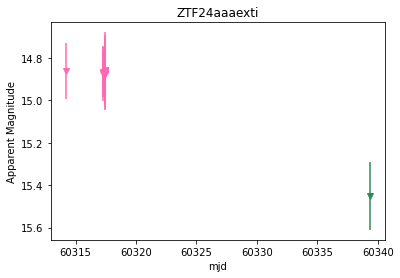

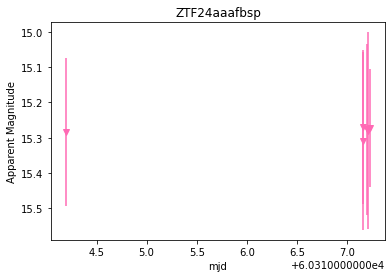

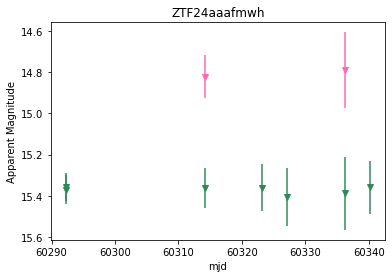

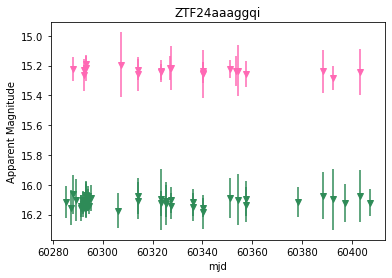

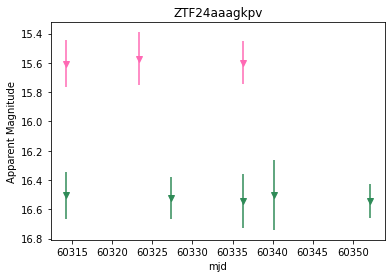

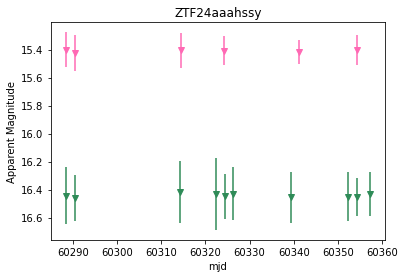

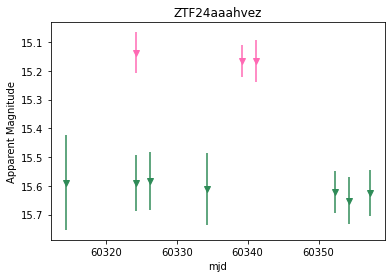

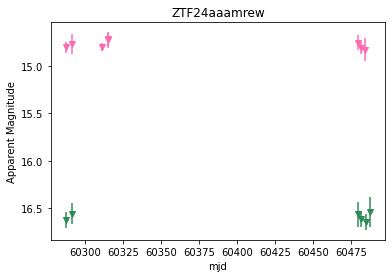

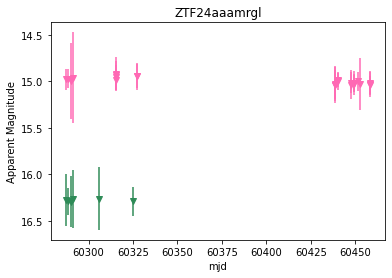

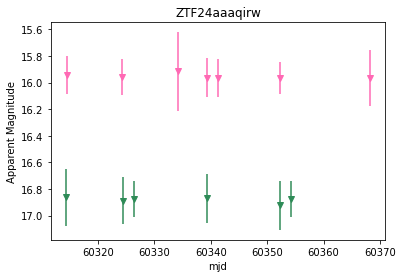

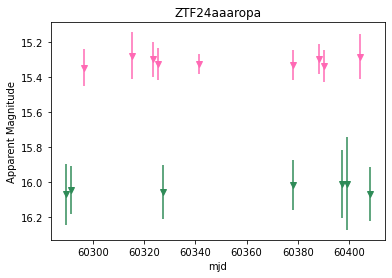

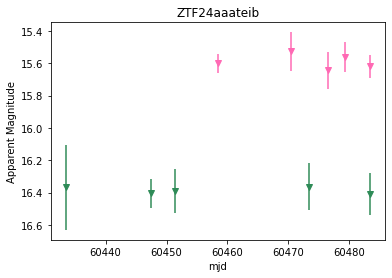

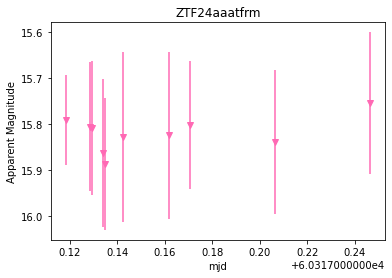

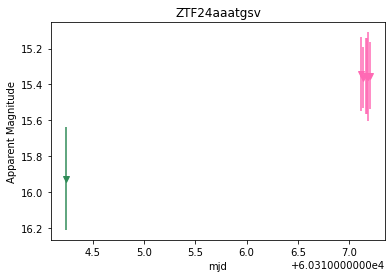

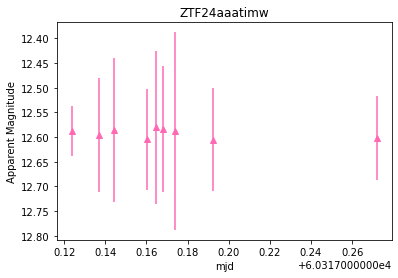

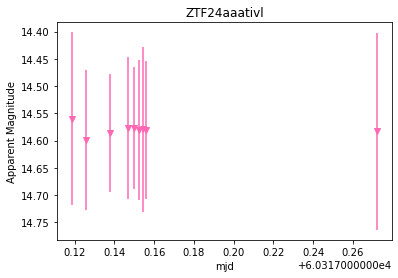

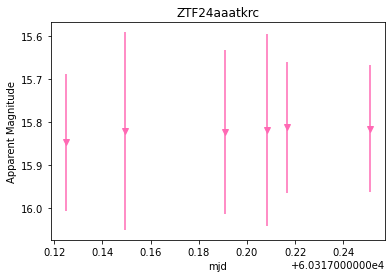

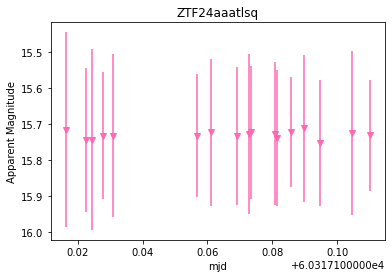

In [32]:
objectList = [row['objectId'] for row in Dippersv4]
Dippersv4 = L.objects(objectList)

# create an dictionary of lightcurves

Dipperv4Dict = {}
for obj in Dippersv4:
    Dipperv4Dict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'seagreen',2:'hotpink', 3: 'indigo'}

now = Time.now().jd

for obj in Dippersv4:
        plt.figure()
        plt.subplot(111)
        for i in Dipperv4Dict[obj['objectId']]['candidates']:
            if 'isdiffpos' in i:
                if i['isdiffpos']=='t':          # 't' means positive difference magnitude (brightening) 
                                                 # 'f' means negative (fainting)
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) + (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='^',color=cols[i['fid']])
                else:
                    plt.errorbar(i['mjd'],(-2.5*np.log10((10**(-.4*i['magnr'])) - (10**(-.4*i['magpsf'])))) ,i['sigmapsf'],fmt='v',color=cols[i['fid']])

        plt.gca().invert_yaxis()
        plt.ylabel('Apparent Magnitude')
        plt.xlabel('mjd')
        plt.title(obj['objectId'])
        
